# Fermipy tools to improve a model

In this notebook I show how to use Fermipy in order to improve the model for an roi. This is done in a ROI centered on M31 (Andromeda Galaxy).

I report below the configuration file that we are going to use.

We first import a few packages:

In [50]:
import os
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter, SEDPlotter
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image
from math import *

Download raw data (not recommended).

In [51]:
# # Set up a subdirectory for the data
# !mkdir -p M31_data/PH
# !mkdir -p M31_data/SC

# # Download the data and place into the subdirectory
# !wget -P ./M31_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_PH00.fits
# !wget -P ./M31_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_PH01.fits
# !wget -P ./M31_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_PH02.fits
# !wget -P ./M31_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_PH03.fits
# !wget -P ./M31_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_PH04.fits
# !wget -P ./M31_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_PH05.fits
# !wget -P ./M31_data/PH/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_PH06.fits

# !wget -P ./M31_data/SC/ https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L2406171618155144574608_SC00.fits

# # Make a file list
# !ls ./M31_data/PH/*PH*.fits > ./M31_data/PH.txt

Download processed data

In [52]:
if os.path.isfile('../data/M31_data.tar.gz'):
    !tar xzf ../data/M31_data.tar.gz
else:
    !curl -OL --output-dir ./../data/ https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/M31_data.tar.gz
    !tar xzf ./../data/M31_data.tar.gz

Run the initial setup. Should take less than ten minutes if using the processed data, as creating the scrmap can take a while. If using the raw data then other files, such as the ltcubes, must be created. Those calculations can take hours.

In [53]:
gta = GTAnalysis('./M31_data/config_M31.yaml')
gta.setup()

2024-06-19 16:33:55 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.2 
ScienceTools version 2.2.0
2024-06-19 16:33:55 INFO    GTAnalysis.setup(): Running setup.
2024-06-19 16:33:55 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-06-19 16:33:55 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2024-06-19 16:33:55 INFO    GTBinnedAnalysis.setup(): Using external LT cube.


{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


2024-06-19 16:33:56 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
Set MJD-OBS to 54682.655283 from DATE-OBS.
Set MJD-END to 57847.435324 from DATE-END'. [astropy.wcs.wcs]
2024-06-19 16:33:56 INFO    GTBinnedAnalysis.run_gtapp(): Running gtsrcmaps.
2024-06-19 16:33:56 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtsrcmaps scfile=./M31_data/SC/L2406171618155144574608_SC00.fits sctable="SC_DATA" expcube=/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/ltcube_00.fits cmap=/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/ccube_00.fits srcmdl=/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/srcmdl_00.xml bexpmap=/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/bexpmap_00.fits wmap=none outfile=/home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/srcmap_00.fits irfs="P8R2_SOURCE_V6" evtype=3 convol=yes resample=yes rfactor=2 

The model includes the IEM, isotropic template and 3FGL sources. 

In [54]:
gta.print_model()

2024-06-19 16:39:18 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.049   2.409  1.99e-06   2.56       nan       709.4     
3FGL J0040.3+4049      0.640   0.422   6.4e-06   1.13       nan        52.6     
3FGL J0049.0+4224      1.635   0.856  3.11e-06   1.77       nan       224.4     
3FGL J0048.0+3950      1.745   0.429  4.65e-06   1.88       nan       462.9     
3FGL J0039.1+4330      2.326   0.445  2.67e-06   1.96       nan       347.7     
3FGL J0032.5+3912      2.825   0.791  1.28e-06   2.56       nan       445.6     
3FGL J0102.3+4217      3.800   0.982  2.94e-06   2.69       nan      1143.6     
3FGL J0041.9+3639      4.611   1.768   1.7e-06   1.98       nan       206.3     
3FGL J0105.3+3928      4.661   0.591  2.43e-06   2.33       nan       616.4     
3FGL J0023.5+4454      5.052   2.474  2.49e-06   2.57 

We will make first a fit of the roi. I free sources and then I use gta.optimize()

In [55]:
gta.free_sources()
gta.optimize()

2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0042.5+4117     : ['Prefactor', 'Index']
2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0040.3+4049     : ['Prefactor', 'Index']
2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0049.0+4224     : ['Prefactor', 'Index']
2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0048.0+3950     : ['Prefactor', 'Index']
2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0039.1+4330     : ['Prefactor', 'Index']
2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0032.5+3912     : ['Prefactor', 'Index']
2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0102.3+4217     : ['Prefactor', 'Index']
2024-06-19 16:39:18 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0041.9+3639     : ['Prefactor', 'Index']
2024-06-

Joint fit  ['galdiff', 'isodiff']


/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape galdiff TS:   5905.966
Fitting shape isodiff TS:   1007.671
Fitting shape 3FGL J0048.0+3950 TS:    549.804
Fitting shape 3FGL J0105.3+3928 TS:    255.555
Fitting shape 3FGL J0023.5+4454 TS:    222.587
Fitting shape 3FGL J0102.3+4217 TS:    176.053
Fitting shape 3FGL J0042.5+4117 TS:     89.124
Fitting shape 3FGL J0041.9+3639 TS:     79.028
Fitting shape 3FGL J0039.1+4330 TS:     76.181
Fitting shape 3FGL J0040.3+4049 TS:     56.774
Fitting shape 3FGL J0032.5+3912 TS:     42.818
Fitting shape 3FGL J0049.0+4224 TS:     33.710


2024-06-19 16:39:34 INFO    GTAnalysis.optimize(): Finished
2024-06-19 16:39:34 INFO    GTAnalysis.optimize(): LogLike: -246745.627421 Delta-LogLike: 120.400674
2024-06-19 16:39:34 INFO    GTAnalysis.optimize(): Execution time: 15.91 s


{'loglike0': -246866.02809514513,
 'loglike1': -246745.6274212641,
 'dloglike': 120.40067388102761,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

Then, I use gta.fit() to make a more robust fit.

2024-06-19 16:39:34 INFO    GTAnalysis.fit(): Starting fit.
2024-06-19 16:40:54 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   2 Status: 102
2024-06-19 16:40:54 INFO    GTAnalysis.fit(): LogLike:  -246738.220 DeltaLogLike:        7.407 
2024-06-19 16:40:54 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.049   1.771  1.26e-06   2.74     59.38       517.5    *
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7    *
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1    *
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9    *
3FGL J0039.1+4330      2.326   0.290  1.57e-06   2.03     76.85       244.1    *
3FGL J0032.5+3912      2.825   0.686  9.54e-07   2.92     41.70       422.5    *
3FGL J0102.3+4217      3.800   0.830  2.02e

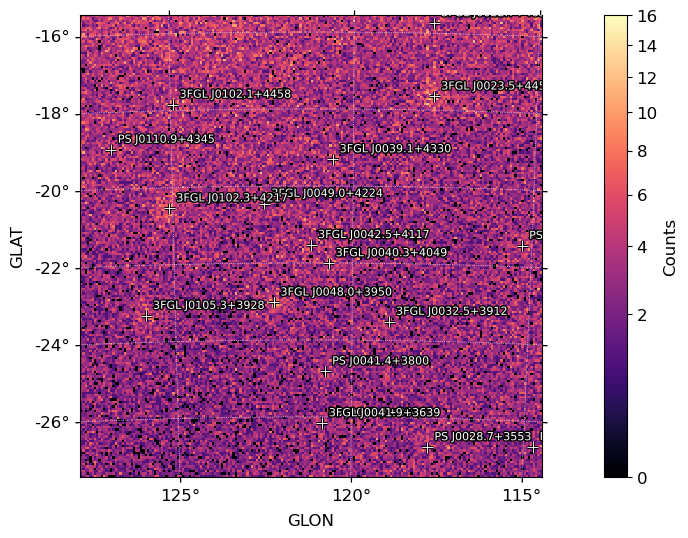

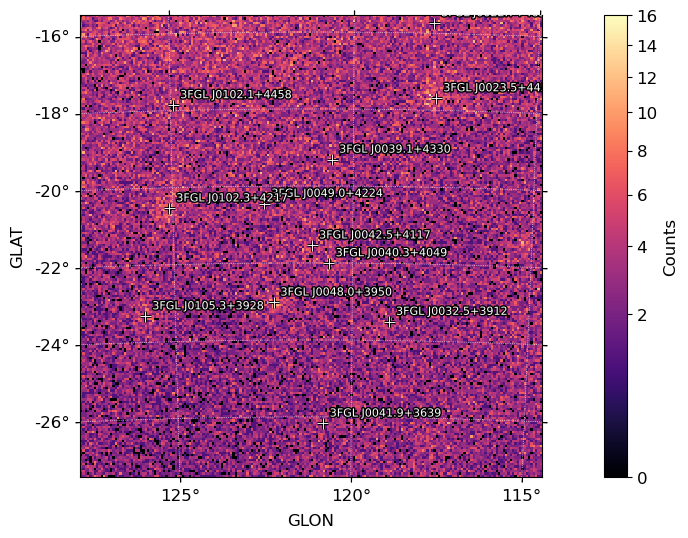

In [56]:
gta.fit()
gta.print_model()
gta.write_roi('initial',make_plots=True,save_model_map=True)
plt.show()

We see how the model is a good representation of the ROI computing the TS map using gta.tsmap.

In [57]:
tsmap_postfit = gta.tsmap(prefix='TSmap_start',make_plots=True,write_fits=True,write_npy=True)

2024-06-19 16:41:18 INFO    GTAnalysis.tsmap(): Generating TS map
2024-06-19 16:41:20 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-06-19 16:44:08 INFO    GTAnalysis.tsmap(): Finished TS map
2024-06-19 16:44:23 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/TSmap_start_pointsource_powerlaw_2.00_tsmap.npy
2024-06-19 16:44:23 INFO    GTAnalysis.tsmap(): Execution time: 184.40 s


<Figure size 640x480 with 0 Axes>

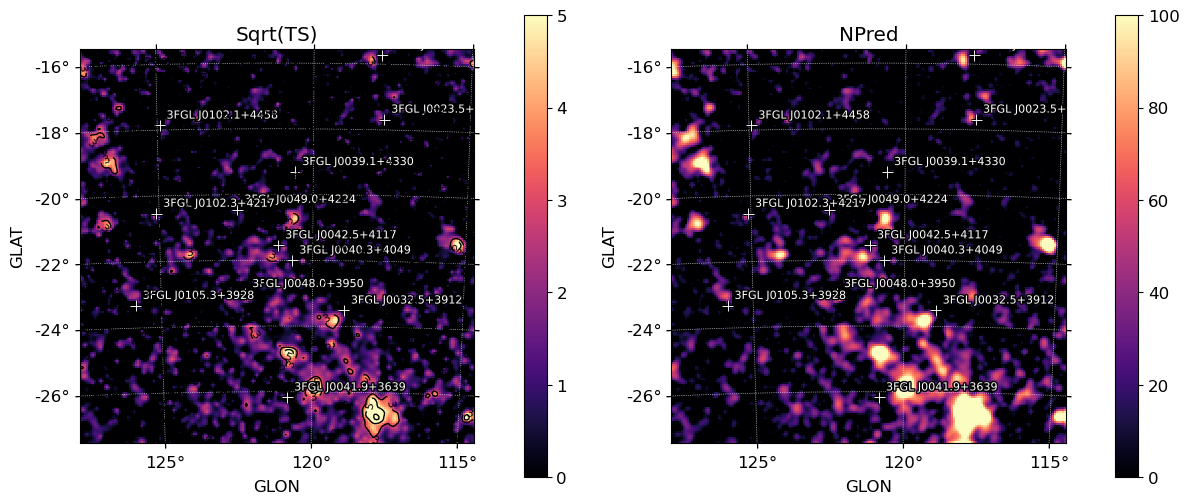

In [58]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_postfit['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_postfit['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

Then, we can use the tool gta.residmap to calculatge the residuals.

In [59]:
resid = gta.residmap('3fgl_j0042.5+4117_postfit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)

2024-06-19 16:44:24 INFO    GTAnalysis.residmap(): Generating residual maps
2024-06-19 16:44:24 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-06-19 16:44:26 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-06-19 16:44:29 INFO    GTAnalysis.residmap(): Finished residual maps
2024-06-19 16:44:41 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0042.5+4117_postfit_pointsource_powerlaw_2.00_residmap.npy
2024-06-19 16:44:41 INFO    GTAnalysis.residmap(): Execution time: 16.84 s


<Figure size 640x480 with 0 Axes>

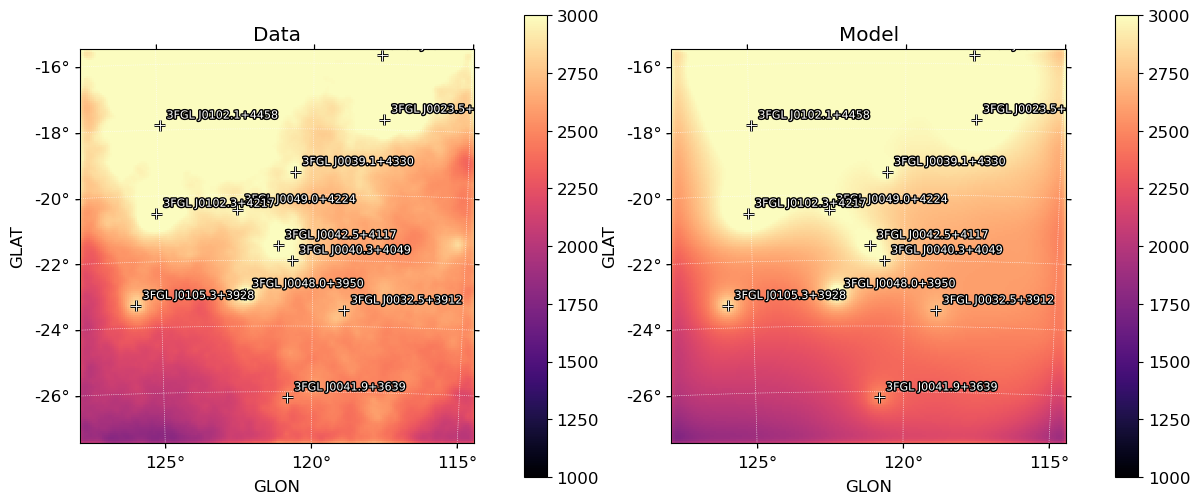

In [60]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')
plt.show()

<Figure size 640x480 with 0 Axes>

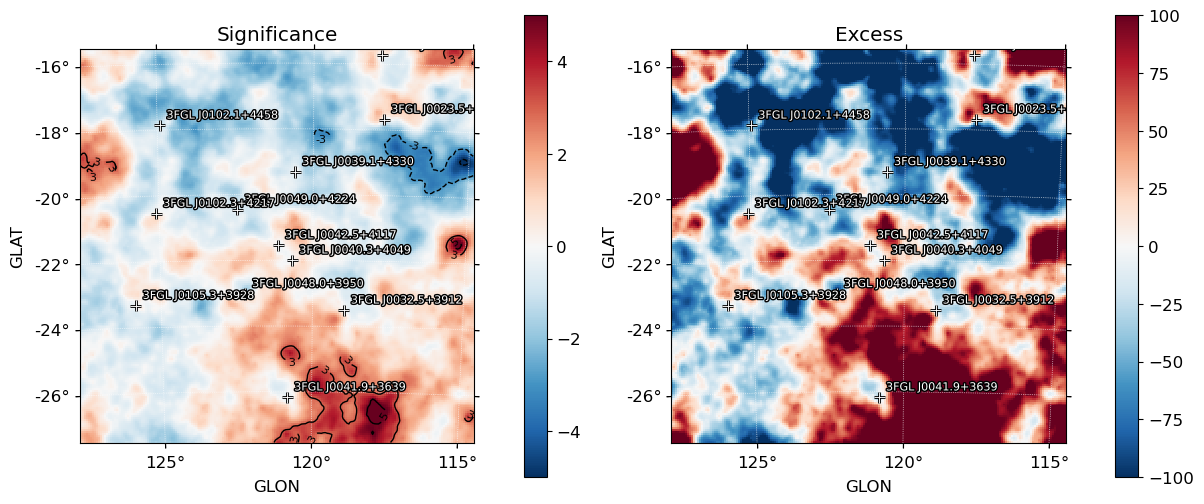

In [61]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')
plt.show()

As we can see there are large residuals in the TS map and in the residuals map. Therefore, we certainly have to improve our model.

In [62]:
gta.delete_sources(minmax_ts=[None,25])

2024-06-19 16:44:42 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0102.1+4458
2024-06-19 16:44:42 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0022.7+4651


In [63]:
gta.load_roi('initial')

2024-06-19 16:44:43 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/initial.npy
2024-06-19 16:44:43 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-06-19 16:44:58 INFO    GTAnalysis.load_roi(): Finished Loading ROI


# Source Localization

The first thing to do in order to improve the model is to relocalize the sources of your model. In particular in our case where we have 3FGL source this is particularly requested.

The localize() method can be used to spatially localize a source. Localization is performed by scanning the likelihood surface in source position in a local patch around the nominal source position. The fit to the source position proceeds in two iterations:
TS Map Scan: Obtain a first estimate of the source position by generating a likelihood map of the region using the tsmap method. In this step all background parameters are fixed to their nominal values. The size of the search region used for this step is set with the dtheta_max parameter. Likelihood Scan: Refine the position of the source by performing a scan of the likelihood surface in a box centered on the best-fit position found in the first iteration. The size of the search region is set to encompass the 99% positional uncertainty contour. This method uses a full likelihood fit at each point in the likelihood scan and will re-fit all free parameters of the model. If a peak is found in the search region and the positional fit succeeds, the method will update the position of the source in the model to the new best-fit position.

We will localize all the sources in the model. We include a function to calculate the angular distance from two directions in the sky.

This will likely take tens of minutes as we are re-localising each source.

In [64]:
def angular_distance_gal(L1, L2, B1, B2):
    # L : [0,2pi], e.g. lon or ra
    # B : [-pi/2,pi/2], e.g. lat or dec

    if L1==L2 and B1==B2: # skip the calculation if the coordinates are equal
        return 0
    else:
        # degrees to radians
        dtr = np.pi/180

        xx = acos( sin(B1*dtr)*sin(B2*dtr) + cos(B1*dtr)*cos(B2*dtr)*cos((L1-L2)*dtr) )

        return xx/dtr

In [65]:
glon0 = np.zeros(len(gta.roi.sources))
glat0 = np.zeros(len(gta.roi.sources))
glon1 = np.zeros(len(gta.roi.sources))
glat1 = np.zeros(len(gta.roi.sources))
offset = np.zeros(len(gta.roi.sources))

for t in range(len(gta.roi.sources)-2):
    
    print("\nRenormalization of source %s"%gta.roi.sources[t].name, "\n")
    
    # Coordinates of the current localisation
    glon0[t] = gta.roi[gta.roi.sources[t].name]['glon']
    glat0[t] = gta.roi[gta.roi.sources[t].name]['glat']

    gta.free_sources(free=False)
    gta.print_model()
    gta.free_sources(skydir=gta.roi[gta.roi.sources[t].name].skydir,distance=[3.0],free=True)
    gta.print_model()
    gta.localize(gta.roi.sources[t].name, update=True, make_plots=True)

    # New localisation coordinates
    glon1[t] = gta.roi[gta.roi.sources[t].name]['glon']
    glat1[t] = gta.roi[gta.roi.sources[t].name]['glat']
    offset[t] = angular_distance_gal(glon0[t],glon1[t],glat0[t],glat1[t]) # angular distance between the old and new localisations
    gta.print_model()

2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0042.5+4117     : ['Prefactor', 'Index']
2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0040.3+4049     : ['Prefactor', 'Index']
2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0049.0+4224     : ['Prefactor', 'Index']
2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0048.0+3950     : ['Prefactor', 'Index']
2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0039.1+4330     : ['Prefactor', 'Index']
2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0032.5+3912     : ['Prefactor', 'Index']
2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0102.3+4217     : ['Prefactor', 'Index']
2024-06-19 16:44:58 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0041.9+3639     : ['Prefactor', 'Index']
2024-06-19 16:44


Renormalization of source 3FGL J0042.5+4117 



2024-06-19 16:45:22 INFO    GTAnalysis._localize(): Localization succeeded.
2024-06-19 16:45:22 INFO    GTAnalysis._localize(): Updating source 3FGL J0042.5+4117 to localized position.
2024-06-19 16:45:22 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0042.5+4117
2024-06-19 16:45:22 INFO    GTAnalysis.add_source(): Adding source 3FGL J0042.5+4117
2024-06-19 16:45:25 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   10.6643 +/-   0.0928,   41.3078 +/-   0.0828)
(glon,glat) = (  121.1594 +/-   0.0915,  -21.5337 +/-   0.0843)
offset =   0.0290 r68 =   0.1260 r95 =   0.2033 r99 =   0.2521
2024-06-19 16:45:25 INFO    GTAnalysis._localize(): LogLike:  -246737.835 DeltaLogLike:        0.385
2024-06-19 16:45:25 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:45:34 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/f


Renormalization of source 3FGL J0040.3+4049 



2024-06-19 16:46:01 WARNING GTAnalysis._localize(): Best-fit position outside of search region.
2024-06-19 16:46:01 WARNING GTAnalysis._localize(): Localization failed.  Keeping existing position.
2024-06-19 16:46:01 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (    9.6554 +/-   0.0344,   40.7669 +/-   0.0365)
(glon,glat) = (  120.3144 +/-   0.0345,  -22.0397 +/-   0.0365)
offset =   0.3277 r68 =   0.0538 r95 =   0.0868 r99 =   0.1076
2024-06-19 16:46:01 INFO    GTAnalysis._localize(): LogLike:  -246768.351 DeltaLogLike:      -30.517
2024-06-19 16:46:01 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:46:11 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0040.3+4049_loc.npy
2024-06-19 16:46:11 INFO    GTAnalysis.localize(): Execution time: 36.59 s
2024-06-


Renormalization of source 3FGL J0049.0+4224 



/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
2024-06-19 16:46:37 WARNING GTAnalysis._localize(): Fit to localization contour failed.
2024-06-19 16:46:37 WARNING GTAnalysis._localize(): Localization failed.  Keeping existing position.
2024-06-19 16:46:37 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   11.4844 +/-   0.0504,   42.2773 +/-   0.0513)
(glon,glat) = (  121.8452 +/-   0.0505,  -20.5828 +/-   0.0512)
offset =   0.5840 r68 =   0.0771 r95 =   0.1244 r99 =   0.1542
2024-06-19 16:46:37 INFO    GTAnalysis._localize(): LogLike:  -246753.997 DeltaLogLike:      -16.155
2024-06-19 16:46:37 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:46:47 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompati


Renormalization of source 3FGL J0048.0+3950 



/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
2024-06-19 16:47:12 WARNING GTAnalysis._localize(): Best-fit position outside of search region.
2024-06-19 16:47:12 WARNING GTAnalysis._localize(): Localization failed.  Keeping existing position.
2024-06-19 16:47:12 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   12.5344 +/-   0.0332,   39.7786 +/-   0.1431)
(glon,glat) = (  122.6603 +/-   0.0325,  -23.0925 +/-   0.1433)
offset =   0.4104 r68 =   0.0592 r95 =   0.0956 r99 =   0.1185
2024-06-19 16:47:12 INFO    GTAnalysis._localize(): LogLike:  -246961.950 DeltaLogLike:     -224.104
2024-06-19 16:47:12 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:47:22 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of i


Renormalization of source 3FGL J0039.1+4330 



2024-06-19 16:47:45 INFO    GTAnalysis._localize(): Localization succeeded.
2024-06-19 16:47:45 INFO    GTAnalysis._localize(): Updating source 3FGL J0039.1+4330 to localized position.
2024-06-19 16:47:45 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0039.1+4330
2024-06-19 16:47:45 INFO    GTAnalysis.add_source(): Adding source 3FGL J0039.1+4330
/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2024-06-19 16:47:48 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (    9.7790 +/-   0.0182,   43.5100 +/-   0.0182)
(glon,glat) = (  120.5652 +/-   0.0182,  -19.3051 +/-


Renormalization of source 3FGL J0032.5+3912 



/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
2024-06-19 16:48:25 WARNING GTAnalysis._localize(): Best-fit position outside of search region.
2024-06-19 16:48:25 WARNING GTAnalysis._localize(): Localization failed.  Keeping existing position.
2024-06-19 16:48:25 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (    7.6465 +/-   0.1563,   39.0059 +/-   0.5505)
(glon,glat) = (  118.5101 +/-   0.1255,  -23.6867 +/-   0.5583)
offset =   0.4397 r68 =   0.3717 r95 =   0.5998 r99 =   0.7438
2024-06-19 16:48:25 INFO    GTAnalysis._localize(): LogLike:  -246750.390 DeltaLogLike:      -12.917
2024-06-19 16:48:25 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:48:35 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of i


Renormalization of source 3FGL J0102.3+4217 



2024-06-19 16:48:59 WARNING GTAnalysis._localize(): Best-fit position outside of search region.
2024-06-19 16:48:59 WARNING GTAnalysis._localize(): Localization failed.  Keeping existing position.
2024-06-19 16:48:59 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   16.0525 +/-   0.0206,   42.1761 +/-   0.0529)
(glon,glat) = (  125.4599 +/-   0.0208,  -20.6329 +/-   0.0528)
offset =   0.3573 r68 =   0.0500 r95 =   0.0807 r99 =   0.1001
2024-06-19 16:48:59 INFO    GTAnalysis._localize(): LogLike:  -246774.966 DeltaLogLike:      -37.421
2024-06-19 16:48:59 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:49:09 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0102.3+4217_loc.npy
2024-06-19 16:49:09 INFO    GTAnalysis.localize(): Execution time: 34.39 s
2024-06-


Renormalization of source 3FGL J0041.9+3639 



2024-06-19 16:49:32 INFO    GTAnalysis._localize(): Localization succeeded.
2024-06-19 16:49:32 INFO    GTAnalysis._localize(): Updating source 3FGL J0041.9+3639 to localized position.
2024-06-19 16:49:32 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0041.9+3639
2024-06-19 16:49:32 INFO    GTAnalysis.add_source(): Adding source 3FGL J0041.9+3639
/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2024-06-19 16:49:35 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   10.5280 +/-   0.0202,   36.6705 +/-   0.0189)
(glon,glat) = (  120.8485 +/-   0.0202,  -26.1636 +/-


Renormalization of source 3FGL J0105.3+3928 



2024-06-19 16:50:07 INFO    GTAnalysis._localize(): Localization succeeded.
2024-06-19 16:50:07 INFO    GTAnalysis._localize(): Updating source 3FGL J0105.3+3928 to localized position.
2024-06-19 16:50:07 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0105.3+3928
2024-06-19 16:50:07 INFO    GTAnalysis.add_source(): Adding source 3FGL J0105.3+3928
2024-06-19 16:50:10 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   16.3067 +/-   0.0168,   39.4855 +/-   0.0190)
(glon,glat) = (  125.8284 +/-   0.0168,  -23.3087 +/-   0.0190)
offset =   0.0225 r68 =   0.0271 r95 =   0.0437 r99 =   0.0542
2024-06-19 16:50:10 INFO    GTAnalysis._localize(): LogLike:  -246735.594 DeltaLogLike:        1.133
2024-06-19 16:50:10 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:50:20 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/f


Renormalization of source 3FGL J0023.5+4454 



2024-06-19 16:50:42 INFO    GTAnalysis._localize(): Localization succeeded.
2024-06-19 16:50:42 INFO    GTAnalysis._localize(): Updating source 3FGL J0023.5+4454 to localized position.
2024-06-19 16:50:42 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0023.5+4454
2024-06-19 16:50:42 INFO    GTAnalysis.add_source(): Adding source 3FGL J0023.5+4454
2024-06-19 16:50:45 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (    5.9482 +/-   0.0257,   44.9549 +/-   0.0180)
(glon,glat) = (  117.8053 +/-   0.0252,  -17.6415 +/-   0.0187)
offset =   0.0700 r68 =   0.0323 r95 =   0.0521 r99 =   0.0646
2024-06-19 16:50:45 INFO    GTAnalysis._localize(): LogLike:  -246728.706 DeltaLogLike:        6.888
2024-06-19 16:50:45 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:50:56 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/f


Renormalization of source 3FGL J0102.1+4458 



2024-06-19 16:51:22 INFO    GTAnalysis._localize(): Localization succeeded.
2024-06-19 16:51:22 INFO    GTAnalysis._localize(): Updating source 3FGL J0102.1+4458 to localized position.
2024-06-19 16:51:22 INFO    GTAnalysis.delete_source(): Deleting source 3FGL J0102.1+4458
2024-06-19 16:51:22 INFO    GTAnalysis.add_source(): Adding source 3FGL J0102.1+4458
2024-06-19 16:51:25 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (   15.5592 +/-   0.0332,   44.9842 +/-   0.0318)
(glon,glat) = (  124.9376 +/-   0.0330,  -17.8455 +/-   0.0321)
offset =   0.0202 r68 =   0.0491 r95 =   0.0792 r99 =   0.0982
2024-06-19 16:51:25 INFO    GTAnalysis._localize(): LogLike:  -246728.479 DeltaLogLike:        0.227
2024-06-19 16:51:25 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:51:35 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/f


Renormalization of source 3FGL J0022.7+4651 



2024-06-19 16:51:58 WARNING GTAnalysis._localize(): Fit to localization contour failed.
2024-06-19 16:51:58 WARNING GTAnalysis._localize(): Localization failed.  Keeping existing position.
2024-06-19 16:51:59 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (    2.7231 +/-   0.9269,   48.0675 +/-   0.9184)
(glon,glat) = (  115.9623 +/-   0.8699,  -14.2548 +/-   0.9726)
offset =   2.3432 r68 =   1.3471 r95 =   2.1740 r99 =   2.6957
2024-06-19 16:51:59 INFO    GTAnalysis._localize(): LogLike:  -246726.015 DeltaLogLike:        2.464
2024-06-19 16:51:59 INFO    GTAnalysis.localize(): Finished localization.
2024-06-19 16:52:08 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0022.7+4651_loc.npy
2024-06-19 16:52:08 INFO    GTAnalysis.localize(): Execution time: 33.37 s
2024-06-19 16:52

Here we have relocalized all the sources present in the model in the following way:

In [66]:
print("       Old position,             new position,           offset,        posr68")
for t in range(len(gta.roi.sources)-2):
    print("(l0,b0)=(%.3f,%.3f) (l1,b1)=(%.3f,%.3f), offset=%.3f and pos_r68=%.3f"%(glon0[t],glat0[t],glon1[t],glat1[t],offset[t],gta.roi[gta.roi.sources[t].name]['pos_r68']))

       Old position,             new position,           offset,        posr68
(l0,b0)=(121.131,-21.545) (l1,b1)=(121.159,-21.534), offset=0.029 and pos_r68=0.126
(l0,b0)=(120.666,-22.005) (l1,b1)=(120.666,-22.005), offset=0.000 and pos_r68=nan
(l0,b0)=(122.454,-20.456) (l1,b1)=(122.454,-20.456), offset=0.000 and pos_r68=nan
(l0,b0)=(122.221,-23.024) (l1,b1)=(122.221,-23.024), offset=0.000 and pos_r68=nan
(l0,b0)=(120.579,-19.314) (l1,b1)=(120.565,-19.305), offset=0.016 and pos_r68=0.028
(l0,b0)=(118.951,-23.513) (l1,b1)=(118.951,-23.513), offset=0.000 and pos_r68=nan
(l0,b0)=(125.092,-20.537) (l1,b1)=(125.092,-20.537), offset=0.000 and pos_r68=nan
(l0,b0)=(120.823,-26.171) (l1,b1)=(120.848,-26.164), offset=0.024 and pos_r68=0.030
(l0,b0)=(125.849,-23.321) (l1,b1)=(125.828,-23.309), offset=0.022 and pos_r68=0.027
(l0,b0)=(117.748,-17.685) (l1,b1)=(117.805,-17.641), offset=0.070 and pos_r68=0.032
(l0,b0)=(124.921,-17.859) (l1,b1)=(124.938,-17.845), offset=0.020 and pos_r68=0.049
(l0,b0)

Now that we have renormalized all the 3FGL sources in the ROI we will perform an other fit.

In [67]:
gta.fit()

2024-06-19 16:52:08 INFO    GTAnalysis.fit(): Starting fit.
2024-06-19 16:52:13 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2024-06-19 16:52:13 INFO    GTAnalysis.fit(): LogLike:  -246728.484 DeltaLogLike:        0.004 


{'fit_quality': 3,
 'fit_status': 0,
 'fit_success': True,
 'dloglike': 0.004199644754407927,
 'edm': 8.736354020421789e-05,
 'loglike': -246728.48436211195,
 'covariance': array([[ 2.79024517e-01,  1.82602055e-04, -1.85840409e-02,
         -5.69766530e-03, -3.95109469e-04, -3.52504693e-04,
          5.10074679e-04],
        [ 1.82602055e-04,  9.15618380e-05,  7.75876541e-06,
          2.91525799e-06, -3.50457938e-07,  1.89005286e-07,
          7.13406667e-07],
        [-1.85840409e-02,  7.75876541e-06,  4.63021100e-02,
          9.18445692e-03, -1.71867882e-04, -8.72970953e-05,
          1.19318993e-04],
        [-5.69766530e-03,  2.91525799e-06,  9.18445692e-03,
          7.15879424e-03, -1.11185395e-05, -4.32538295e-05,
         -6.27460518e-06],
        [-3.95109469e-04, -3.50457938e-07, -1.71867882e-04,
         -1.11185395e-05,  1.92083385e-04,  7.28413307e-06,
         -4.10924057e-04],
        [-3.52504693e-04,  1.89005286e-07, -8.72970953e-05,
         -4.32538295e-05,  7.2841

In [68]:
tsmap_start = gta.tsmap(prefix='TSmap_start',make_plots=True,write_fits=True,write_npy=True)

2024-06-19 16:52:13 INFO    GTAnalysis.tsmap(): Generating TS map
2024-06-19 16:52:15 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-06-19 16:55:15 INFO    GTAnalysis.tsmap(): Finished TS map
2024-06-19 16:55:29 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/TSmap_start_pointsource_powerlaw_2.00_tsmap.npy
2024-06-19 16:55:29 INFO    GTAnalysis.tsmap(): Execution time: 196.24 s


<Figure size 640x480 with 0 Axes>

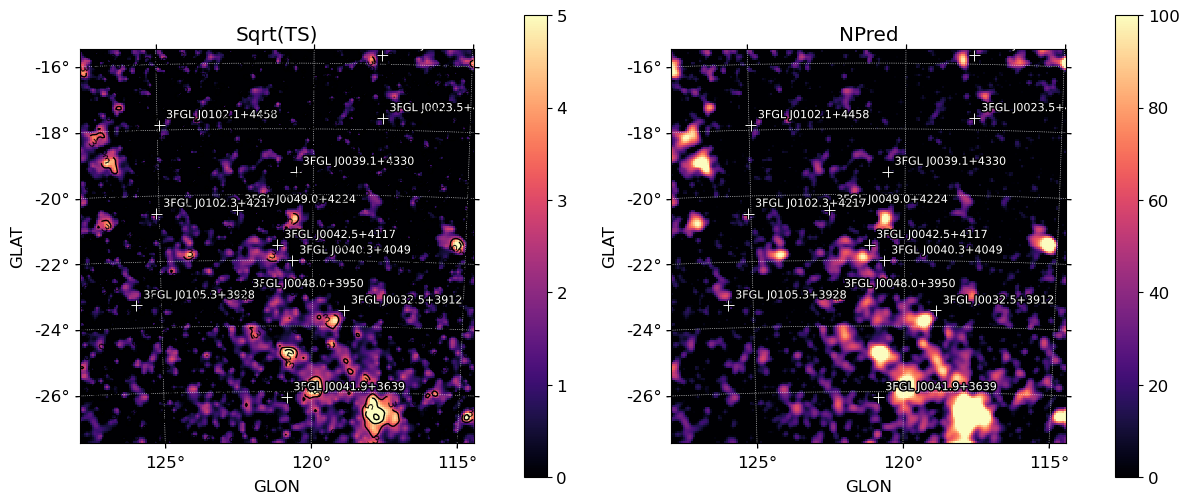

In [69]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_start['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_start['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

In [70]:
resid_M31 = gta.residmap('M31_postfit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)

2024-06-19 16:55:31 INFO    GTAnalysis.residmap(): Generating residual maps
2024-06-19 16:55:31 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-06-19 16:55:33 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-06-19 16:55:36 INFO    GTAnalysis.residmap(): Finished residual maps
2024-06-19 16:55:47 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/M31_postfit_pointsource_powerlaw_2.00_residmap.npy
2024-06-19 16:55:47 INFO    GTAnalysis.residmap(): Execution time: 16.69 s


<Figure size 640x480 with 0 Axes>

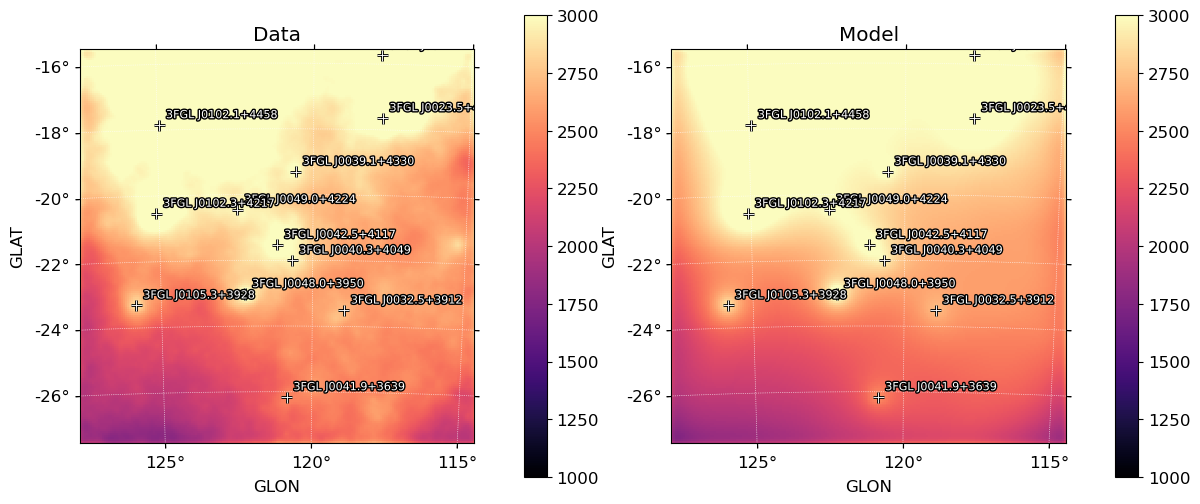

In [71]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_M31['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid_M31['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')
plt.show()

<Figure size 640x480 with 0 Axes>

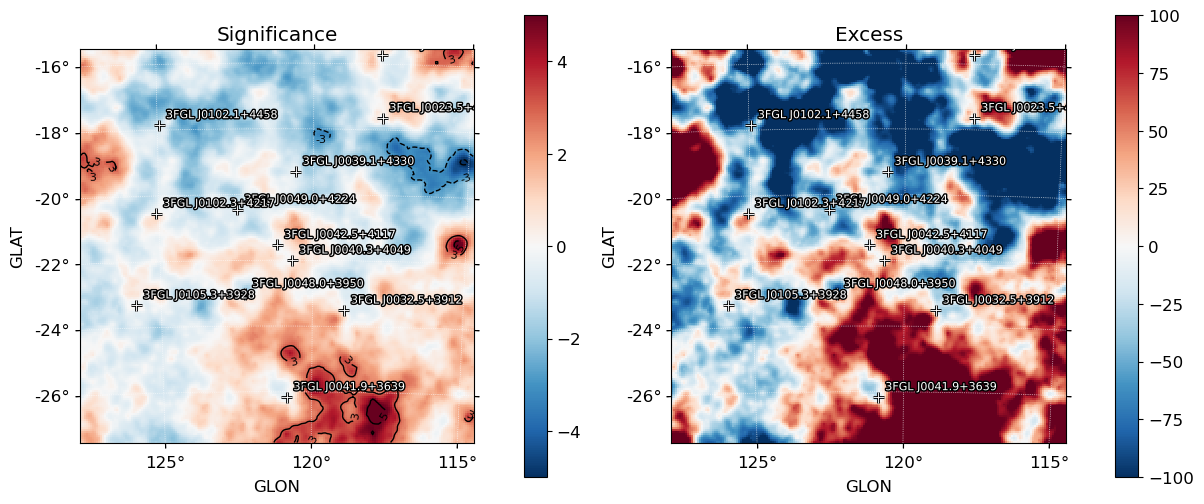

In [72]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_M31['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid_M31['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')
plt.show()

In [73]:
gta.write_roi('relocalization',make_plots=True,save_model_map=True)

2024-06-19 16:55:49 INFO    GTBinnedAnalysis.write_xml(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/relocalization_00.xml...
2024-06-19 16:55:49 INFO    GTAnalysis.write_fits(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/relocalization.fits...
2024-06-19 16:56:05 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2024-06-19 16:56:10 INFO    GTAnalysis.write_roi(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/relocalization.npy...


In [74]:
gta.load_roi('relocalization')

2024-06-19 16:56:14 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/relocalization.npy
2024-06-19 16:56:15 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-06-19 16:56:30 INFO    GTAnalysis.load_roi(): Finished Loading ROI


# Source Extension

Now we will run the extension to all sources using gta.extension.

In [75]:
help(gta.extension)

Help on method extension in module fermipy.extension:

extension(name, **kwargs) method of fermipy.gtanalysis.GTAnalysis instance
    Test this source for spatial extension with the likelihood
    ratio method (TS_ext).  This method will substitute an
    extended spatial model for the given source and perform a
    one-dimensional scan of the spatial extension parameter over
    the range specified with the width parameters.  The 1-D
    profile likelihood is then used to compute the best-fit value,
    upper limit, and TS for extension.  The nuisance parameters
    that will be simultaneously fit when performing the spatial
    scan can be controlled with the ``fix_shape``,
    ``free_background``, and ``free_radius`` options.  By default
    the position of the source will be fixed to its current
    position.  A simultaneous fit to position and extension can be
    performed by setting ``fit_position`` to True.
    
    Parameters
    ----------
    name : str
        Source name.


We use the option update=True and sqrt_ts_threshold=3.0 that will update the spatial template of the source if the TS of extension larger than 9.

Fitting the extension for each source will likely take tens of minutes to process.

In [76]:
extension_best  = np.zeros(len(gta.roi.sources))
extension_error = np.zeros(len(gta.roi.sources))
extension_ul = np.zeros(len(gta.roi.sources))
extension_TS = np.zeros(len(gta.roi.sources))

for t in range(len(gta.roi.sources)-2):

    print("\nRunning extension on source %s"%gta.roi.sources[t].name ,"\n")
    
    gta.free_sources(free=False)
    gta.print_model()
    gta.free_sources(skydir=gta.roi[gta.roi.sources[t].name].skydir,distance=[3.0],free=True)
    gta.print_model()
    extension = gta.extension(gta.roi.sources[t].name, update=True, width_max=5.0, sqrt_ts_threshold=3.0)
    extension_best[t] = extension['ext']
    extension_error[t] = extension['ext_err']
    extension_ul[t] = extension['ext_ul95']
    extension_TS[t] = extension['ts_ext']
    print("%.3f %.3f %.3f %.3f"%(extension['ext'],extension['ext_err'],extension['ext_ul95'],extension['ts_ext']))
    gta.print_model()

2024-06-19 16:56:30 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0023.5+4454     : ['Prefactor', 'Index']
2024-06-19 16:56:30 INFO    GTAnalysis.free_source(): Fixing parameters for 3FGL J0022.7+4651     : ['Prefactor', 'Index']
2024-06-19 16:56:30 INFO    GTAnalysis.free_source(): Fixing parameters for isodiff               : ['Normalization']
2024-06-19 16:56:30 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Prefactor', 'Index']
2024-06-19 16:56:30 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   1.688   1.2e-06   2.74     62.26       517.5     
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7     
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1     
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01


Running extension on source 3FGL J0042.5+4117 



2024-06-19 16:56:55 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 16:57:09 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 16:57:17 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 16:57:38 INFO    GTAnalysis._extension(): Best-fit extension: 0.5200 + 0.1259 - 0.1329
2024-06-19 16:57:38 INFO    GTAnalysis._extension(): TS_ext:        13.173
2024-06-19 16:57:38 INFO    GTAnalysis._extension(): Extension UL: 0.7296
2024-06-19 16:57:38 INFO    GTAnalysis._extension(): LogLike:  -246722.446 DeltaLogLike:        6.727
2024-06-19 16:57:38 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 16:57:44 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0042.5+4117_ext.npy
2024-06-19 16:57:44 INFO    GTAnalysis.extension(): Execution time: 73.82 s
2024-06-19 16:57:44 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9    *
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7    *
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1    *
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9    *
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0    *
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0042.5+4117', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 16:58:12 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 16:58:28 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 16:58:31 INFO    GTAnalysis._extension(): Testing point-source model.
/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/fermipy/extension.py:311: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(o['ts_ext']) > sqrt_ts_threshold):
2024-06-19 16:58:34 INFO    GTAnalysis._extension(): Best-fit extension: 0.0032 + 0.0395 -    nan
2024-06-19 16:58:34 INFO    GTAnalysis._extension(): TS_ext:        -0.004
2024-06-19 16:58:34 INFO    GTAnalysis._extension(): Extension UL: 0.0614
2024-06-19 16:58:34 INFO    GTAnalysis._extension(): LogLike:  -246721.846 DeltaLogLike:        0.600
2024-06-19 16:58:34 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 16:58:40 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0040.3+4049_ext.npy
2024-06-19 16:58:40 INFO    GTAnalysis.extension(): Execution time: 55.93 s
2024-06-19 16:58:40 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9    *
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7    *
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1    *
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9    *
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0    *
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0040.3+4049', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 16:59:10 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 16:59:25 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 16:59:29 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 16:59:31 INFO    GTAnalysis._extension(): Best-fit extension: 0.0621 + 0.0356 - 0.0433
2024-06-19 16:59:31 INFO    GTAnalysis._extension(): TS_ext:        1.343
2024-06-19 16:59:31 INFO    GTAnalysis._extension(): Extension UL: 0.1261
2024-06-19 16:59:31 INFO    GTAnalysis._extension(): LogLike:  -246721.975 DeltaLogLike:        0.685
2024-06-19 16:59:31 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 16:59:37 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0049.0+4224_ext.npy
2024-06-19 16:59:37 INFO    GTAnalysis.extension(): Execution time: 57.22 s
2024-06-19 16:59:37 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9    *
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7    *
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1    *
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9    *
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0    *
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0049.0+4224', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:00:02 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:00:16 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:00:20 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:00:22 INFO    GTAnalysis._extension(): Best-fit extension: 0.0641 + 0.0159 - 0.0165
2024-06-19 17:00:22 INFO    GTAnalysis._extension(): TS_ext:        6.772
2024-06-19 17:00:22 INFO    GTAnalysis._extension(): Extension UL: 0.0905
2024-06-19 17:00:22 INFO    GTAnalysis._extension(): LogLike:  -246719.376 DeltaLogLike:        3.303
2024-06-19 17:00:22 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:00:29 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0048.0+3950_ext.npy
2024-06-19 17:00:29 INFO    GTAnalysis.extension(): Execution time: 51.16 s
2024-06-19 17:00:29 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9    *
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7    *
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1    *
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9    *
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0048.0+3950', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:00:55 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:01:10 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:01:13 INFO    GTAnalysis._extension(): Testing point-source model.
/home/pmarinos/miniforge3/envs/fermipy/lib/python3.9/site-packages/fermipy/extension.py:311: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(o['ts_ext']) > sqrt_ts_threshold):
2024-06-19 17:01:16 INFO    GTAnalysis._extension(): Best-fit extension: 0.0032 + 0.0309 -    nan
2024-06-19 17:01:16 INFO    GTAnalysis._extension(): TS_ext:        -0.011
2024-06-19 17:01:16 INFO    GTAnalysis._extension(): Extension UL: 0.0539
2024-06-19 17:01:16 INFO    GTAnalysis._extension(): LogLike:  -246722.967 DeltaLogLike:       -0.008
2024-06-19 17:01:16 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:01:22 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0039.1+4330_ext.npy
2024-06-19 17:01:22 INFO    GTAnalysis.extension(): Execution time: 53.31 s
2024-06-19 17:01:22 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9    *
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7    *
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1    *
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0    *
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0039.1+4330', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:01:48 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:02:03 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:03:49 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:03:52 INFO    GTAnalysis._extension(): Best-fit extension: 2.5503 + 0.4425 - 0.5153
2024-06-19 17:03:52 INFO    GTAnalysis._extension(): TS_ext:        5.411
2024-06-19 17:03:52 INFO    GTAnalysis._extension(): Extension UL: 3.2909
2024-06-19 17:03:52 INFO    GTAnalysis._extension(): LogLike:  -246720.187 DeltaLogLike:        2.639
2024-06-19 17:03:52 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:03:58 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0032.5+3912_ext.npy
2024-06-19 17:03:58 INFO    GTAnalysis.extension(): Execution time: 156.21 s
2024-06-19 17:03:58 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9    *
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7    *
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1     
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e

{'name': '3FGL J0032.5+3912', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:04:23 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:04:37 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:04:40 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:04:43 INFO    GTAnalysis._extension(): Best-fit extension: 0.0567 + 0.0481 -    nan
2024-06-19 17:04:43 INFO    GTAnalysis._extension(): TS_ext:        0.324
2024-06-19 17:04:43 INFO    GTAnalysis._extension(): Extension UL: 0.1373
2024-06-19 17:04:43 INFO    GTAnalysis._extension(): LogLike:  -246722.698 DeltaLogLike:        0.140
2024-06-19 17:04:43 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:04:49 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0102.3+4217_ext.npy
2024-06-19 17:04:49 INFO    GTAnalysis.extension(): Execution time: 50.97 s
2024-06-19 17:04:49 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9     
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7     
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1    *
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0102.3+4217', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:05:14 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:05:29 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:06:33 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:06:55 INFO    GTAnalysis._extension(): Best-fit extension: 2.2098 + 0.2478 - 0.2685
2024-06-19 17:06:55 INFO    GTAnalysis._extension(): TS_ext:        16.423
2024-06-19 17:06:55 INFO    GTAnalysis._extension(): Extension UL: 2.6606
2024-06-19 17:06:55 INFO    GTAnalysis._extension(): LogLike:  -246714.726 DeltaLogLike:        8.295
2024-06-19 17:06:55 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:07:01 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0041.9+3639_ext.npy
2024-06-19 17:07:01 INFO    GTAnalysis.extension(): Execution time: 131.75 s
2024-06-19 17:07:01 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9     
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7     
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1     
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e

{'name': '3FGL J0041.9+3639', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:07:27 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:07:41 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:07:43 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:07:46 INFO    GTAnalysis._extension(): Best-fit extension: 0.0659 + 0.0346 - 0.0400
2024-06-19 17:07:46 INFO    GTAnalysis._extension(): TS_ext:        1.476
2024-06-19 17:07:46 INFO    GTAnalysis._extension(): Extension UL: 0.1244
2024-06-19 17:07:46 INFO    GTAnalysis._extension(): LogLike:  -246713.946 DeltaLogLike:        0.780
2024-06-19 17:07:46 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:07:52 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0105.3+3928_ext.npy
2024-06-19 17:07:52 INFO    GTAnalysis.extension(): Execution time: 51.10 s
2024-06-19 17:07:52 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9     
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7     
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1     
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0105.3+3928', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:08:16 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:08:29 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:08:32 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:08:35 INFO    GTAnalysis._extension(): Best-fit extension: 0.0959 + 0.0400 - 0.0416
2024-06-19 17:08:35 INFO    GTAnalysis._extension(): TS_ext:        3.351
2024-06-19 17:08:35 INFO    GTAnalysis._extension(): Extension UL: 0.1585
2024-06-19 17:08:35 INFO    GTAnalysis._extension(): LogLike:  -246712.743 DeltaLogLike:        1.651
2024-06-19 17:08:35 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:08:41 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0023.5+4454_ext.npy
2024-06-19 17:08:41 INFO    GTAnalysis.extension(): Execution time: 48.62 s
2024-06-19 17:08:41 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9     
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7     
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1     
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0023.5+4454', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:09:09 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:09:24 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:09:27 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:09:30 INFO    GTAnalysis._extension(): Best-fit extension: 0.0147 + 0.0573 -    nan
2024-06-19 17:09:30 INFO    GTAnalysis._extension(): TS_ext:        0.004
2024-06-19 17:09:30 INFO    GTAnalysis._extension(): Extension UL: 0.1054
2024-06-19 17:09:30 INFO    GTAnalysis._extension(): LogLike:  -246714.149 DeltaLogLike:       -0.024
2024-06-19 17:09:30 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:09:36 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0102.1+4458_ext.npy
2024-06-19 17:09:36 INFO    GTAnalysis.extension(): Execution time: 55.16 s
2024-06-19 17:09:36 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9     
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7     
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1     
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0102.1+4458', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

2024-06-19 17:09:56 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-06-19 17:10:08 INFO    GTAnalysis._extension(): Generating TS map.
2024-06-19 17:10:12 INFO    GTAnalysis._extension(): Testing point-source model.
2024-06-19 17:10:15 INFO    GTAnalysis._extension(): Best-fit extension: 0.5390 + 0.7570 -    nan
2024-06-19 17:10:15 INFO    GTAnalysis._extension(): TS_ext:        0.361
2024-06-19 17:10:15 INFO    GTAnalysis._extension(): Extension UL: 1.7850
2024-06-19 17:10:15 INFO    GTAnalysis._extension(): LogLike:  -246713.979 DeltaLogLike:        0.174
2024-06-19 17:10:15 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fit

2024-06-19 17:10:20 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/3fgl_j0022.7+4651_ext.npy
2024-06-19 17:10:20 INFO    GTAnalysis.extension(): Execution time: 44.59 s
2024-06-19 17:10:20 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.207  2.24e-06   2.40     75.59       693.9     
3FGL J0040.3+4049      0.640   0.204   1.9e-06   1.89     79.54       195.7     
3FGL J0049.0+4224      1.635   0.359  1.32e-06   1.76     34.07        93.1     
3FGL J0048.0+3950      1.745   0.658  5.84e-06   2.01    557.75       833.9     
3FGL J0039.1+4330      2.338   0.282  1.55e-06   2.02     78.38       242.0     
3FGL J0032.5+3912      2.825   0.686  9.54e-

{'name': '3FGL J0022.7+4651', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [], 'fit_position': False, 'width_min': 0.01, 'width_max': 5.0, 'width_nstep': 21, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': True, 'save_model_map': False, 'sqrt_ts_threshold': 3.0, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.        , 0.01      , 0.01364421, 0.01861646, 0.02540069,
       0.03465724, 0.04728708, 0.0645195 , 0.08803178, 0.12011244,
       0.16388398, 0.2236068 , 0.30509388, 0.4162766 , 0.56797668,
       0.77495949, 1.05737126, 1.44269991, 1.96845052, 2.68579588,
       3.66455719, 5.        ]), 'dloglike': ar

In [77]:
print("Ext_best  Ext_err  Ext_UL  TS_ext")
for t in range(len(gta.roi.sources)-2):
    print("%.3f     %.3f    %.3f   %.3f"%(extension_best[t],extension_error[t],extension_ul[t],extension_TS[t]))

Ext_best  Ext_err  Ext_UL  TS_ext
0.520     0.129    0.730   13.173
0.003     0.039    0.061   -0.004
0.062     0.039    0.126   1.343
0.064     0.016    0.091   6.772
0.003     0.031    0.054   -0.011
2.550     0.479    3.291   5.411
0.057     0.048    0.137   0.324
2.210     0.258    2.661   16.423
0.066     0.037    0.124   1.476
0.096     0.041    0.159   3.351
0.015     0.057    0.105   0.004
0.539     0.757    1.785   0.361


So the only source for which we have found an extension is 3FGL J0042.5+4117 

Let's calculate the TS map and the residual map.

In [78]:
tsmap_ext = gta.tsmap(prefix='TSmap_ext',make_plots=True,write_fits=True,write_npy=True)

2024-06-19 17:10:20 INFO    GTAnalysis.tsmap(): Generating TS map
2024-06-19 17:10:23 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-06-19 17:13:07 INFO    GTAnalysis.tsmap(): Finished TS map
2024-06-19 17:13:22 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/TSmap_ext_pointsource_powerlaw_2.00_tsmap.npy
2024-06-19 17:13:22 INFO    GTAnalysis.tsmap(): Execution time: 181.05 s


<Figure size 800x600 with 0 Axes>

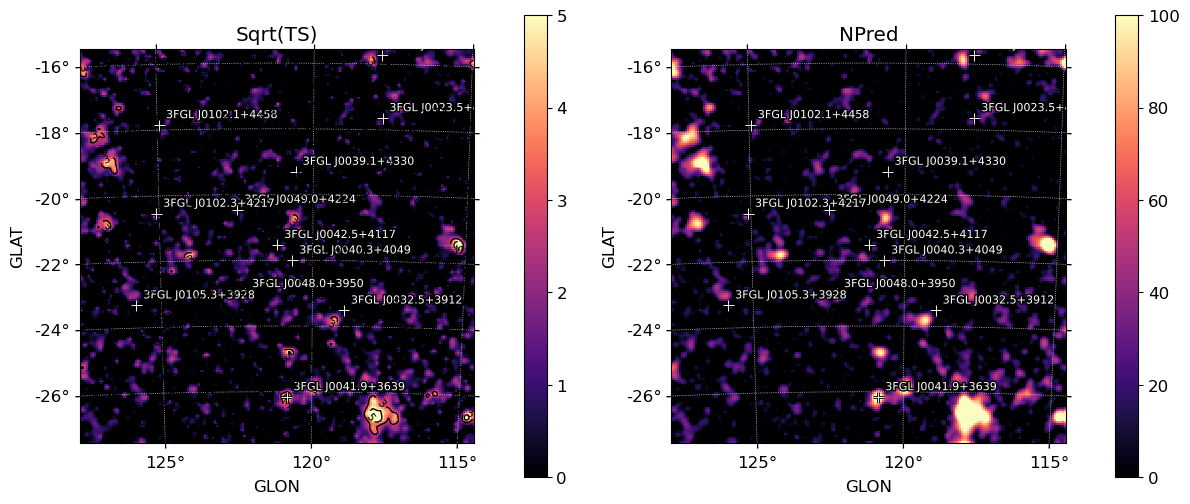

In [79]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_ext['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_ext['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

In [80]:
resid_ext = gta.residmap('Residual_ext',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)

2024-06-19 17:13:23 INFO    GTAnalysis.residmap(): Generating residual maps
2024-06-19 17:13:23 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-06-19 17:13:25 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-06-19 17:13:28 INFO    GTAnalysis.residmap(): Finished residual maps
2024-06-19 17:13:39 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/Residual_ext_pointsource_powerlaw_2.00_residmap.npy
2024-06-19 17:13:39 INFO    GTAnalysis.residmap(): Execution time: 16.46 s


<Figure size 640x480 with 0 Axes>

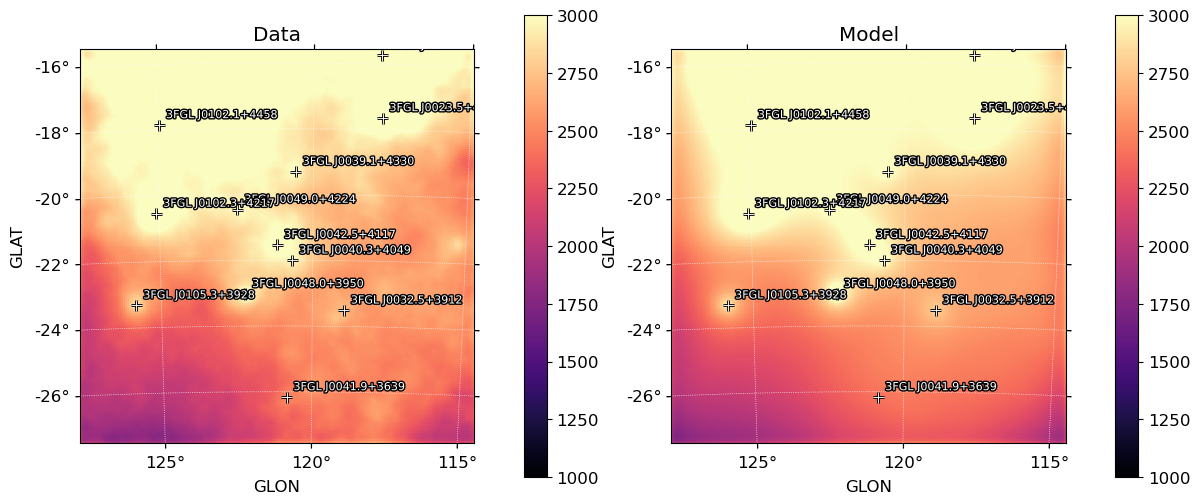

In [81]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_ext['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid_ext['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')
plt.show()

<Figure size 640x480 with 0 Axes>

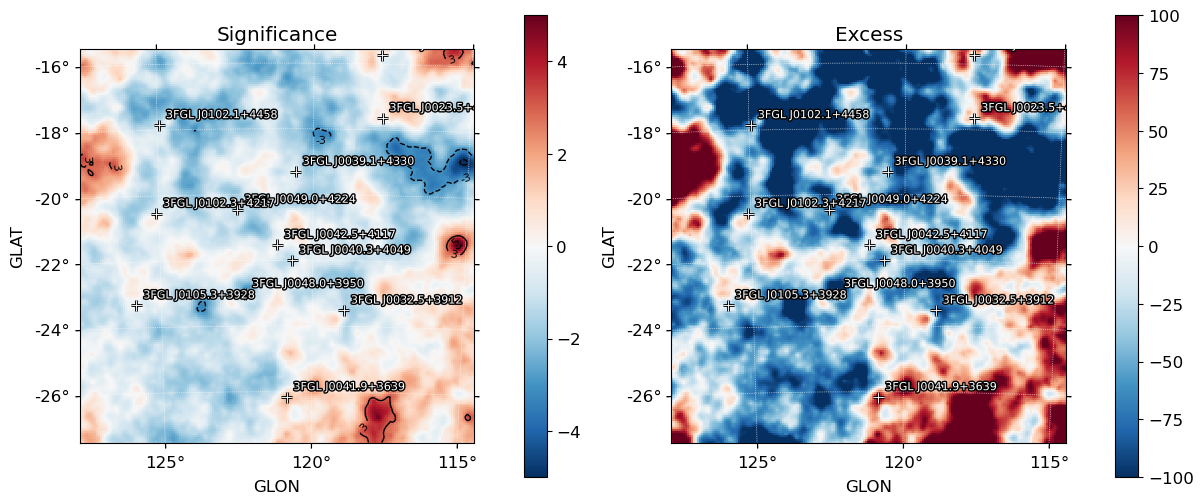

In [82]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_ext['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid_ext['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')
plt.show()

In [83]:
gta.write_roi('extension',make_plots=True,save_model_map=True)

2024-06-19 17:13:41 INFO    GTBinnedAnalysis.write_xml(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/extension_00.xml...
2024-06-19 17:13:41 INFO    GTAnalysis.write_fits(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/extension.fits...
2024-06-19 17:13:56 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2024-06-19 17:14:01 INFO    GTAnalysis.write_roi(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/extension.npy...


# Find new sources

After we have renormalized the 3FGL sources and we have found if the sources are extended, we will try to find new sources with the tool find_sources(). 

find_sources() is an iterative source-finding algorithm that uses peak detection on a TS map to find new source candidates. The procedure for adding new sources at each iteration is as follows:
Generate a TS map for the test source model defined with the model argument.
Identify peaks with sqrt(TS) > sqrt_ts_threshold and an angular distance of at least min_separation from a higher amplitude peak in the map.
Order the peaks by TS and add a source at each peak starting from the highest TS peak. Set the source position by fitting a 2D parabola to the log-likelihood surface around the peak maximum. After adding each source, re-fit its spectral parameters.
Add sources at the N highest peaks up to N = sources_per_iter.
Source finding is repeated up to max_iter iterations or until no peaks are found in a given iteration. Sources found by the method are added to the model and given designations PS JXXXX.X+XXXX according to their position in celestial coordinates.

Finding sources will take tens of minutes.

In [84]:
gta.free_sources()
findsource = gta.find_sources(sqrt_ts_threshold=5,min_separation=0.2,tsmap_fitter='tsmap')

2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0042.5+4117     : ['Prefactor', 'Index']
2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0040.3+4049     : ['Prefactor', 'Index']
2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0049.0+4224     : ['Prefactor', 'Index']
2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0048.0+3950     : ['Prefactor', 'Index']
2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0039.1+4330     : ['Prefactor', 'Index']
2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0032.5+3912     : ['Prefactor', 'Index']
2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0102.3+4217     : ['Prefactor', 'Index']
2024-06-19 17:14:05 INFO    GTAnalysis.free_source(): Freeing parameters for 3FGL J0041.9+3639     : ['Prefactor', 'Index']
2024-06-

In [85]:
gta.print_model()

2024-06-19 17:32:31 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
3FGL J0042.5+4117      0.041   2.765   2.6e-06   2.45    106.17       862.7    *
3FGL J0040.3+4049      0.640   0.214  1.91e-06   1.73     64.09       123.5    *
3FGL J0049.0+4224      1.635   0.367  1.32e-06   1.77     36.66       100.0    *
3FGL J0048.0+3950      1.745   0.631  5.77e-06   1.99    558.18       804.5    *
3FGL J0039.1+4330      2.338   0.306  1.57e-06   2.07     86.82       279.3    *
3FGL J0032.5+3912      2.825   0.609  8.54e-07   2.88     37.09       389.3    *
PS J0041.4+3800        3.268   0.527  1.39e-06   1.62     37.68        59.4     
3FGL J0102.3+4217      3.800   0.875  2.06e-06   2.96    196.45       983.4    *
PS J0042.1+3640        4.597   1.069  1.21e-06   1.85     42.43       106.5     
3FGL J0041.9+3639      4.601   8.647  6.94e-06   2.40 

So 6 sources have been found with TS between about 20-50. 

In [86]:
tsmap_final = gta.tsmap(prefix='TSmap_final',make_plots=True,write_fits=True,write_npy=True)

2024-06-19 17:32:31 INFO    GTAnalysis.tsmap(): Generating TS map
2024-06-19 17:32:33 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-06-19 17:35:19 INFO    GTAnalysis.tsmap(): Finished TS map
2024-06-19 17:35:33 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/TSmap_final_pointsource_powerlaw_2.00_tsmap.npy
2024-06-19 17:35:33 INFO    GTAnalysis.tsmap(): Execution time: 182.00 s


<Figure size 800x600 with 0 Axes>

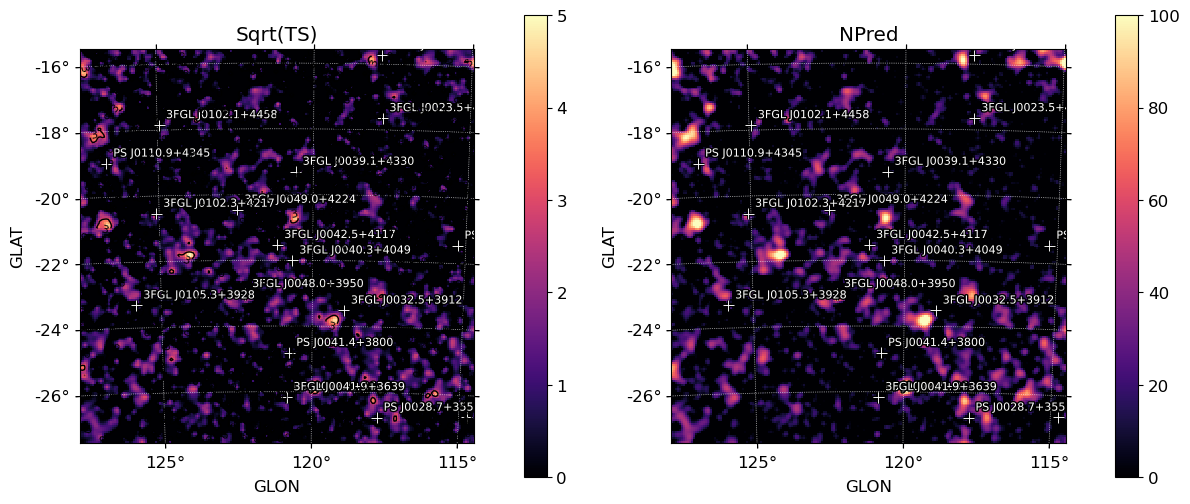

In [87]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(tsmap_final['sqrt_ts'],roi=gta.roi).plot(levels=[0,3,5,7],vmin=0,vmax=5,subplot=121,cmap='magma')
plt.gca().set_title('Sqrt(TS)')
ROIPlotter(tsmap_final['npred'],roi=gta.roi).plot(vmin=0,vmax=100,subplot=122,cmap='magma')
plt.gca().set_title('NPred')
plt.show()

In [88]:
resid_final = gta.residmap('Residual_final',model={'SpatialModel' : 'PointSource', 'Index' : 2.0},write_fits=True,write_npy=True,make_plots=True)

2024-06-19 17:35:34 INFO    GTAnalysis.residmap(): Generating residual maps
2024-06-19 17:35:34 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-06-19 17:35:37 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-06-19 17:35:40 INFO    GTAnalysis.residmap(): Finished residual maps
2024-06-19 17:35:51 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/Residual_final_pointsource_powerlaw_2.00_residmap.npy
2024-06-19 17:35:51 INFO    GTAnalysis.residmap(): Execution time: 17.37 s


<Figure size 640x480 with 0 Axes>

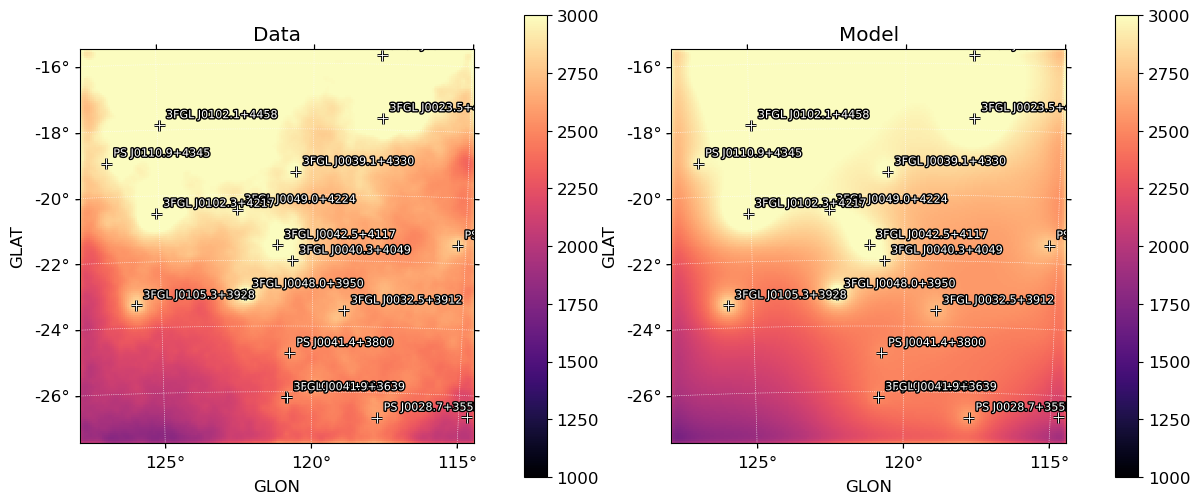

In [89]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_final['data'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=121,cmap='magma')
plt.gca().set_title('Data')
ROIPlotter(resid_final['model'],roi=gta.roi).plot(vmin=1000,vmax=3000,subplot=122,cmap='magma')
plt.gca().set_title('Model')
plt.show()

<Figure size 640x480 with 0 Axes>

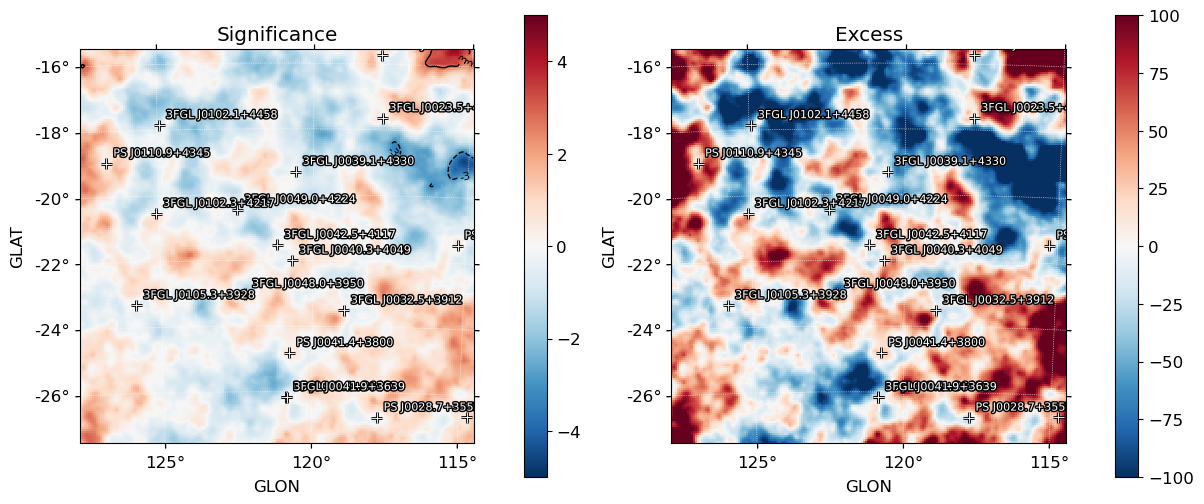

In [90]:
plt.clf()
fig = plt.figure(figsize=(14,6))
ROIPlotter(resid_final['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(resid_final['excess'],roi=gta.roi).plot(vmin=-100,vmax=100,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess')
plt.show()

In [91]:
gta.write_roi('rel_extension_TS25',make_plots=True,save_model_map=True)

2024-06-19 17:35:54 INFO    GTBinnedAnalysis.write_xml(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/rel_extension_TS25_00.xml...
2024-06-19 17:35:54 INFO    GTAnalysis.write_fits(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/rel_extension_TS25.fits...
2024-06-19 17:36:09 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.
2024-06-19 17:36:13 INFO    GTAnalysis.write_roi(): Writing /home/pmarinos/Documents/fermipyextra_branches/fermipy-extra/notebooks/M31_data/rel_extension_TS25.npy...


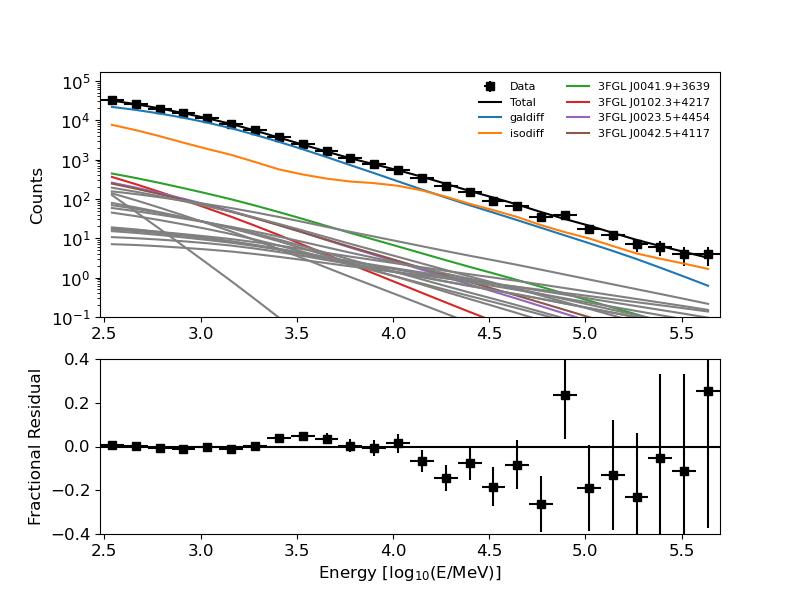

In [92]:
Image(filename='./M31_data/rel_extension_TS25_counts_spectrum.png') 

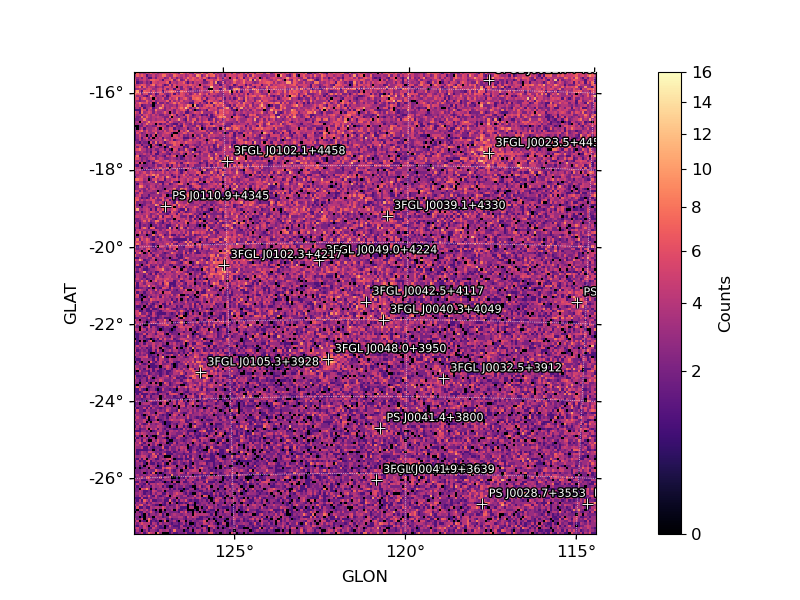

In [93]:
Image(filename='./M31_data/rel_extension_TS25_counts_map_2.477_5.699.png') 

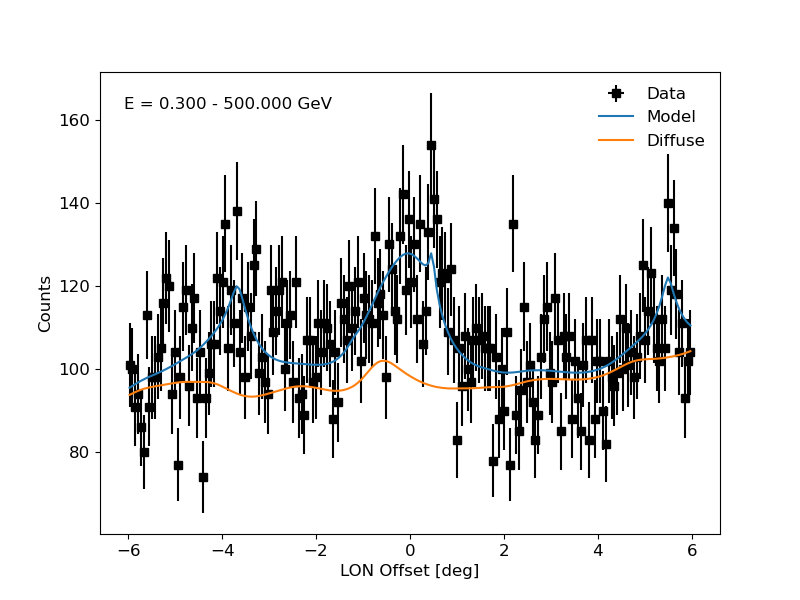

In [94]:
Image(filename='./M31_data/rel_extension_TS25_counts_map_xproj_2.477_5.699.png') 

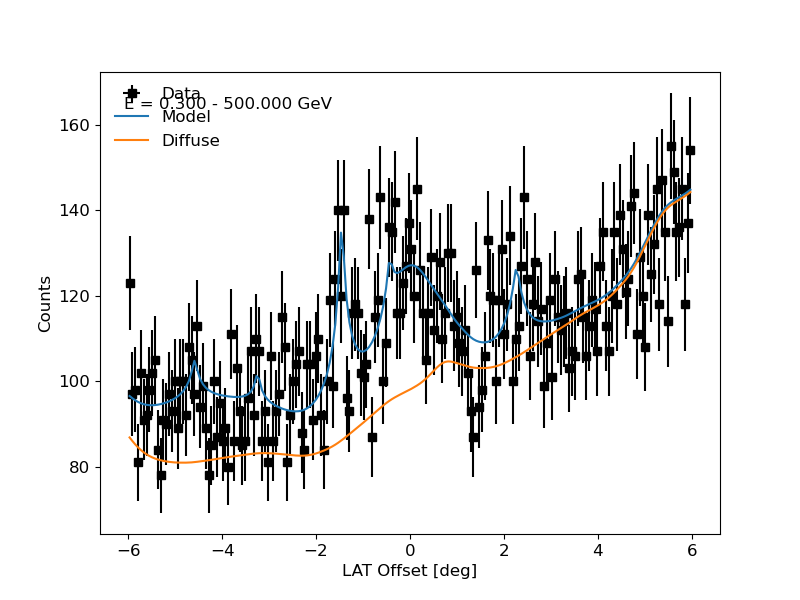

In [95]:
Image(filename='./M31_data/rel_extension_TS25_counts_map_yproj_2.477_5.699.png') 